In [49]:
# import the zip file
import zipfile
import os

## Step-1 Understand the Dataset

##  Extract ZIP files and verify dataset structure

In [50]:
train_zip = "train-20260201T112829Z-3-001.zip"
test_zip = "test-20260201T112832Z-3-001.zip"
valid_zip = "valid-20260201T112824Z-3-001.zip"

In [51]:
extract_path = "data"

os.makedirs(extract_path, exist_ok = True)

for zip_path in [train_zip,test_zip,valid_zip]:
    with zipfile.ZipFile(zip_path,'r') as zip_ref:
        zip_ref.extractall(extract_path)

print(" Extraction Done!")
print("Folders inside dataset:", os.listdir(extract_path))

 Extraction Done!
Folders inside dataset: ['test', 'test-20260201T112832Z-3-001.zip', 'train', 'train-20260201T112829Z-3-001.zip', 'valid', 'valid-20260201T112824Z-3-001.zip']


## Check classes

In [52]:
train_path = "data/train"
test_path = "data/test"
valid_path = "data/valid"

print(" Train Classes :" , os.listdir(train_path))
print(" Test Classes :" , os.listdir(test_path))
print(" Valid Classes :" , os.listdir(valid_path))

 Train Classes : ['glioma', 'meningioma', 'no_tumor', 'pituitary', '_classes.csv']
 Test Classes : ['glioma', 'meningioma', 'no_tumor', 'pituitary', '_classes.csv']
 Valid Classes : ['glioma', 'meningioma', 'no_tumor', 'pituitary', '_classes.csv']


##   Remove _classes.csv from train/valid/test

In [53]:
paths = ["data/train" , "data/test" , "data/valid"]

for p in paths:
    csv_path = os.path.join(p, "_classes.csv")
    if os.path.exists(csv_path):
       os.remove(csv_path)
       print(f"Removed : {csv_path}")
    else:
        print(f" No csv file found: {p}")

Removed : data/train\_classes.csv
Removed : data/test\_classes.csv
Removed : data/valid\_classes.csv


In [54]:
print("train" , os.listdir("data/train"))
print("test" , os.listdir("data/test"))
print("valid" , os.listdir("data/valid"))

train ['glioma', 'meningioma', 'no_tumor', 'pituitary']
test ['glioma', 'meningioma', 'no_tumor', 'pituitary']
valid ['glioma', 'meningioma', 'no_tumor', 'pituitary']


### Check class imbalance

In [55]:
def count_images(folder_path):
    class_count = {}
    for cls in os.listdir(folder_path):
        cls_path = os.path.join(folder_path , cls)
        if os.path.isdir(cls_path):
            class_count[cls] = len(os.listdir(cls_path))
    return class_count

train_counts = count_images("data/train")
test_counts = count_images("data/test")
valid_counts = count_images("data/valid")

print(" Train counts :" , train_counts)
print(" Test counts :" , test_counts)
print(" valid counts :" , valid_counts)

 Train counts : {'glioma': 564, 'meningioma': 358, 'no_tumor': 335, 'pituitary': 438}
 Test counts : {'glioma': 80, 'meningioma': 63, 'no_tumor': 49, 'pituitary': 54}
 valid counts : {'glioma': 161, 'meningioma': 124, 'no_tumor': 99, 'pituitary': 118}


### Check Image Resolution Consistency

In [56]:
from PIL import Image
import random

def check_image_size(folder_path , sample = 10):
    sizes =[]
    for cls in os.listdir(folder_path):
        cls_path = os.path.join(folder_path , cls)
        if os.path.isdir(cls_path):
            images = os.listdir(cls_path)
            random_img = random.sample(images , min(sample , len(images)))

            for img_name in random_img:
                img_path = os.path.join(cls_path , img_name)
                img = Image.open(img_path)
                sizes.append(img.size)

    return set(sizes)

size_found = check_image_size("data/train",sample =10)
print("different image size found :" , size_found)

different image size found : {(640, 640)}


### Visualize Image Distribution (Bar Chart)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

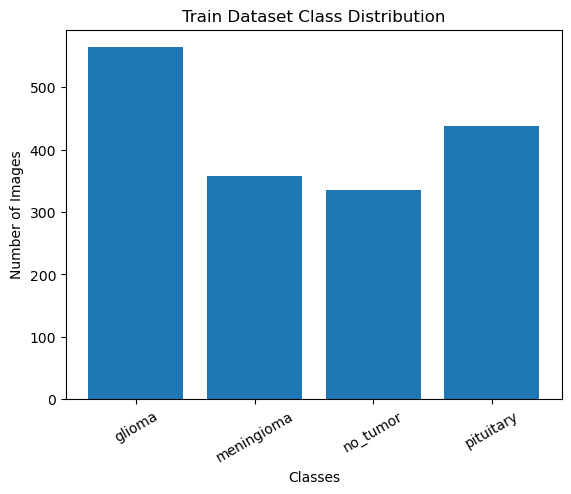

In [58]:
plt.bar(train_counts.keys() , train_counts.values())
plt.title("Train Dataset Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.xticks(rotation=30)
plt.show()

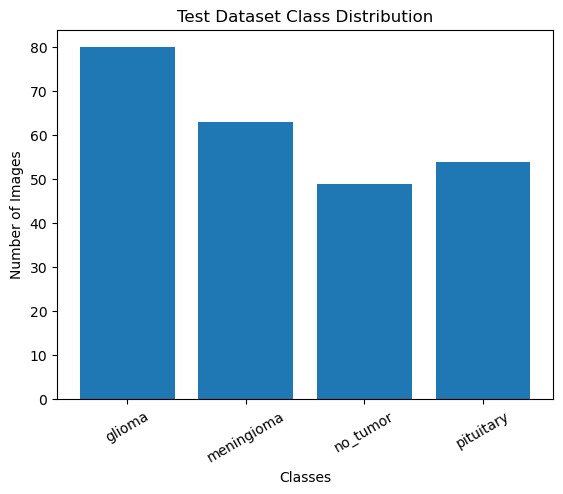

In [60]:
plt.bar(test_counts.keys() , test_counts.values())
plt.title("Test Dataset Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.xticks(rotation=30)
plt.show()

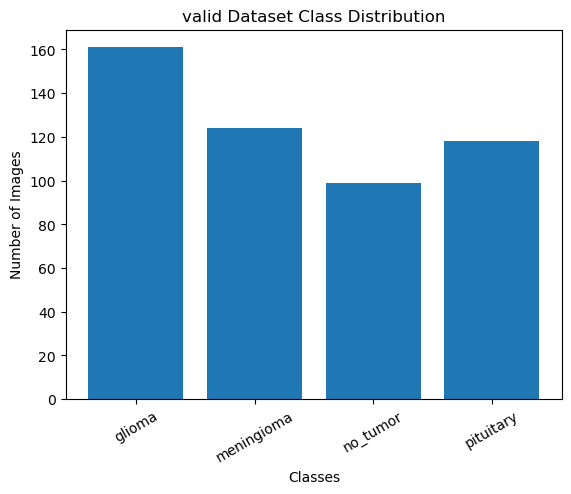

In [59]:
plt.bar(valid_counts.keys() , valid_counts.values())
plt.title("valid Dataset Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.xticks(rotation=30)
plt.show()

### show sample images

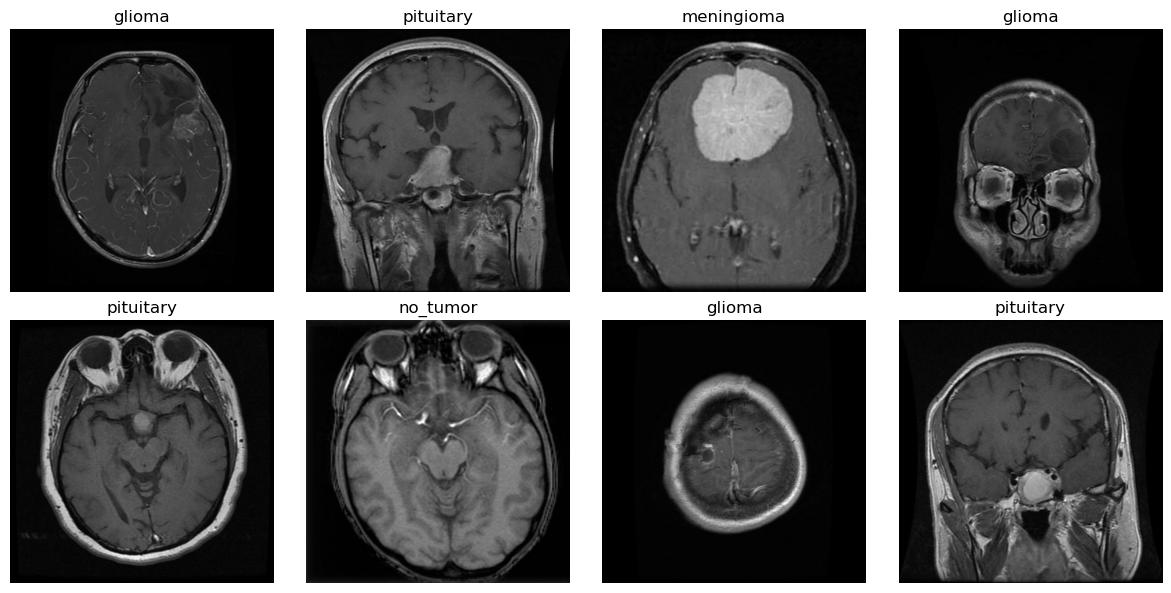

In [61]:
def show_sample_images(folder_path, n=8):
    classes = [c for c in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path ,c))]
    plt.figure(figsize=(12, 6))

    for i in range(n):
        cls = random.choice(classes)
        cls_path = os.path.join(folder_path ,cls)
        img_name = random.choice(os.listdir(cls_path))
        img_path = os.path.join(cls_path , img_name)

        img = Image.open(img_path)
        plt.subplot(2, 4, i+1)
        plt.imshow(img , cmap = "gray")
        plt.title(cls)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_sample_images("data/train" , n = 8)

## Step 2: Data Preprocessing

### Data Preprocessing (Resize + Normalize)

### Load Dataset with Resizing (224×224)

#### This automatically resizes every image to 224×224

In [62]:
import tensorflow as tf

IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True
)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/valid",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=False
)

Found 1695 files belonging to 4 classes.
Found 502 files belonging to 4 classes.
Found 246 files belonging to 4 classes.


### Normalize Pixel Values (0–1)

#### Pixel values are normally 0–255.

#### Normalization converts them to 0–1, which helps the model learn better.

In [63]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x,y : (normalization_layer(x),y))
test_ds = test_ds.map(lambda x,y : (normalization_layer(x),y))
valid_ds = valid_ds.map(lambda x,y : (normalization_layer(x),y))

### Speed Boost

#### This makes training faster

In [64]:
autotune = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = autotune)
test_ds = test_ds.cache().prefetch(buffer_size = autotune)
valid_ds = valid_ds.cache().prefetch(buffer_size = autotune)

In [65]:
for images,labels in train_ds.take(1):
    print("Image batch size :", images.shape)
    print("Minimum pixcel value: " , tf.reduce_min(images).numpy())
    print("maximum pixcel value:, ", tf.reduce_max(images).numpy())

Image batch size : (32, 224, 224, 3)
Minimum pixcel value:  0.0
maximum pixcel value:,  1.0


## Step-3 Data Augmentation

### Create Augmentation Layer

In [66]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


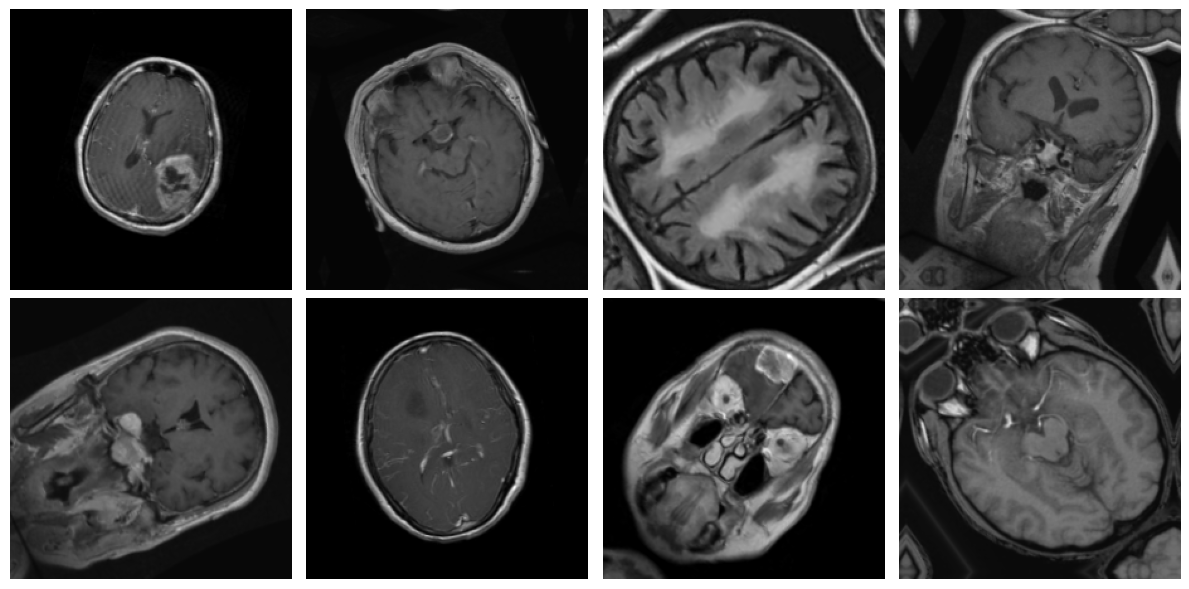

In [67]:
for images,labels in train_ds.take(1):
    plt.figure(figsize=(12,6))
    for i in range(8):
        augmented_img = data_augmentation(images[i:i+1])
        plt.subplot(2 , 4, i+1)
        plt.imshow(augmented_img[0])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

## Step 4: Build Deep Learning Model

#### Now we will build the actual classifier model.

### Here we will build our own CNN using:

### Convolution layers (feature extraction)

### MaxPooling (reduce size + keep important info)

### BatchNormalization (stabilize training)

### Dropout (reduce overfitting)

### Dense layers (final classification)

In [20]:
from tensorflow.keras import layers, models

### Build CNN Model

In [68]:
cnn_upgrade = tf.keras.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.Rescaling(1./255),
    data_augmentation,

    layers.Conv2D(32, 3, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(4, activation="softmax")
])

cnn_upgrade.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [69]:
cnn_stable.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [70]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=2,
    min_lr=1e-6
)

history = cnn_stable.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=20,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.2968 - loss: 1.3855 - val_accuracy: 0.3207 - val_loss: 1.3828 - learning_rate: 1.0000e-04
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.3402 - loss: 1.3785 - val_accuracy: 0.3207 - val_loss: 1.3738 - learning_rate: 1.0000e-04
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.3193 - loss: 1.3690 - val_accuracy: 0.3207 - val_loss: 1.3733 - learning_rate: 1.0000e-04
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.3420 - loss: 1.3613 - val_accuracy: 0.3207 - val_loss: 1.3717 - learning_rate: 1.0000e-04
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.3240 - loss: 1.3635 - val_accuracy: 0.3207 - val_loss: 1.3706 - learning_rate: 1.0000e-04
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.3182 - loss: 1.3679 - val_accuracy: 0.3207 - val_loss: 1.3688 - learning_rate: 1.0000e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.3321 - loss:

In [71]:
import numpy as np

x_val, y_val = next(iter(valid_ds))
pred = cnn_stable.predict(x_val)

pred_classes = np.argmax(pred, axis=1)
print("✅ Prediction distribution:", dict(zip(*np.unique(pred_classes, return_counts=True))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
✅ Prediction distribution: {0: 21, 2: 5, 3: 6}


### Conv2D
### Learns patterns like edges, shapes, tumor texture.
### MaxPooling2D
### Reduces image size and keeps important features.
### BatchNormalization
### Makes training stable and faster (less fluctuations).
### Dropout
### Randomly turns off some neurons → avoids overfitting.
### Dense + Softmax
### Gives final probability for each tumor class.

In [76]:
import tensorflow as tf

IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True
)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/valid",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=False
)

Found 1695 files belonging to 4 classes.
Found 502 files belonging to 4 classes.
Found 246 files belonging to 4 classes.


## Transfer Learningraining

### Transfer Learning Workflow (Correct Order)### 
Step 1: Load pretrained base model (ImageNet weights)### 
Step 2: Freeze base model (trainable=False### )
Step 3: Add new Dense layers for your 4 tumor class### es
Step 4: Comp### ile
Step 5: Train (initial train### ing)
:Step 6 (Optional): Unfreeze top layers → Fine-tuning

In [77]:
from tensorflow.keras import layers
import tensorflow as tf

num_classes = 4

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.15),
])

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)  # ✅ only this
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

mobilenet_model = tf.keras.Model(inputs, outputs)

mobilenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

mobilenet_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_1 (TrueDivide)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract_1 (Subtract)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │           5,124 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [78]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, min_lr=1e-6)

history = mobilenet_model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 53s 754ms/step - accuracy: 0.4335 - loss: 1.3737 - val_accuracy: 0.7590 - val_loss: 0.6869 - learning_rate: 0.0010
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 808ms/step - accuracy: 0.7464 - loss: 0.6544 - val_accuracy: 0.7550 - val_loss: 0.5771 - learning_rate: 0.0010
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 812ms/step - accuracy: 0.8072 - loss: 0.4880 - val_accuracy: 0.7709 - val_loss: 0.5499 - learning_rate: 0.0010
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 737ms/step - accuracy: 0.8371 - loss: 0.4302 - val_accuracy: 0.7869 - val_loss: 0.5354 - learning_rate: 0.0010
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 705ms/step - accuracy: 0.8526 - loss: 0.4068 - val_accuracy: 0.8127 - val_loss: 0.5217 - learning_rate: 0.0010
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 680ms/step - accuracy: 0.8636 - loss: 0.4024 - val_accuracy: 0.7769 - val_loss: 0.5802 - learning_rate: 0.0010
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 798ms/step - accuracy: 0.8587 - loss: 0.

In [79]:
test_loss, test_acc = mobilenet_model.evaluate(test_ds)
print("✅ MobileNetV2 Test Accuracy:", test_acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 401ms/step - accuracy: 0.8000 - loss: 0.4746
✅ MobileNetV2 Test Accuracy: 0.792682945728302


In [84]:
import tensorflow as tf

# Unfreeze base model
base_model.trainable = True

# Freeze first layers, unfreeze last 30 layers only
for layer in base_model.layers[:-30]:
    layer.trainable = False

mobilenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # ✅ very small LR
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_fine = mobilenet_model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=6
)

Epoch 1/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 804ms/step - accuracy: 0.9006 - loss: 0.2539 - val_accuracy: 0.8466 - val_loss: 0.4935
Epoch 2/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 822ms/step - accuracy: 0.9086 - loss: 0.2486 - val_accuracy: 0.8566 - val_loss: 0.4886
Epoch 3/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 813ms/step - accuracy: 0.9077 - loss: 0.2597 - val_accuracy: 0.8526 - val_loss: 0.4788
Epoch 4/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 48s 901ms/step - accuracy: 0.9161 - loss: 0.2354 - val_accuracy: 0.8526 - val_loss: 0.4817
Epoch 5/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 885ms/step - accuracy: 0.9183 - loss: 0.2232 - val_accuracy: 0.8625 - val_loss: 0.4796
Epoch 6/6
53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 839ms/step - accuracy: 0.9162 - loss: 0.2450 - val_accuracy: 0.8625 - val_loss: 0.4784


In [86]:
test_loss, test_acc = mobilenet_model.evaluate(test_ds)
print("✅ MobileNetV2 Test Accuracy:", test_acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 391ms/step - accuracy: 0.8321 - loss: 0.4678
✅ MobileNetV2 Test Accuracy: 0.8170731663703918


In [87]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for x_batch, y_batch in test_ds:
    preds = mobilenet_model.predict(x_batch)
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
print("✅ Confusion Matrix:\n", cm)

print("\n✅ Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=['glioma','meningioma','no_tumor','pituitary']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
✅ Confusion Matrix:
 [[76  1  0  3]
 [10 34  1 18]
 [ 6  3 37  3]
 [ 0  0  0 54]]

✅ Classification Report:

              precision    recall  f1-score   support

      glioma       0.83      0.95      0.88        80
  meningioma       0.89      0.54      0.67        63
    no_tumor       0.97      0.76      0.85        49
   pituitary       0.69      1.00      0.82        54

    accuracy                           0.82       246
   macro avg       0.85      0.81      0.81       246
weighted avg       0.84      0.82      0.81       246



In [88]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# collect all train labels (because label_mode="int")
y_train = np.concatenate([y.numpy() for x, y in train_ds])

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = {i: w for i, w in enumerate(class_weights)}
print("✅ Class weights:", class_weight_dict)

✅ Class weights: {0: 0.7513297872340425, 1: 1.183659217877095, 2: 1.2649253731343284, 3: 0.9674657534246576}


In [89]:
history_weighted = mobilenet_model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=8,
    class_weight=class_weight_dict
)

Epoch 1/8
53/53 ━━━━━━━━━━━━━━━━━━━━ 45s 686ms/step - accuracy: 0.9156 - loss: 0.2395 - val_accuracy: 0.8725 - val_loss: 0.4661
Epoch 2/8
53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 743ms/step - accuracy: 0.9342 - loss: 0.2124 - val_accuracy: 0.8725 - val_loss: 0.4427
Epoch 3/8
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 781ms/step - accuracy: 0.9212 - loss: 0.2308 - val_accuracy: 0.8785 - val_loss: 0.4409
Epoch 4/8
53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 811ms/step - accuracy: 0.9329 - loss: 0.2055 - val_accuracy: 0.8825 - val_loss: 0.4280
Epoch 5/8
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 875ms/step - accuracy: 0.9361 - loss: 0.1903 - val_accuracy: 0.8865 - val_loss: 0.4328
Epoch 6/8
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 883ms/step - accuracy: 0.9389 - loss: 0.1762 - val_accuracy: 0.8805 - val_loss: 0.4142
Epoch 7/8
53/53 ━━━━━━━━━━━━━━━━━━━━ 49s 931ms/step - accuracy: 0.9428 - loss: 0.1899 - val_accuracy: 0.8825 - val_loss: 0.4040
Epoch 8/8
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 873ms/step - accuracy: 0.9416 - loss: 0.1788 - val_accuracy: 0.

In [90]:
test_loss, test_acc = mobilenet_model.evaluate(test_ds)
print("✅ New Test Accuracy after class weights:", test_acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 392ms/step - accuracy: 0.8528 - loss: 0.3911
✅ New Test Accuracy after class weights: 0.8414633870124817


In [91]:
from sklearn.metrics import classification_report, confusion_matrix

y_true, y_pred = [], []

for x_batch, y_batch in test_ds:
    preds = mobilenet_model.predict(x_batch)
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print("✅ Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

print("\n✅ Classification Report:\n")
print(classification_report(y_true, y_pred,
                            target_names=['glioma','meningioma','no_tumor','pituitary']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
✅ Confusion Matrix:
 [[76  1  0  3]
 [ 8 38  1 16]
 [ 6  2 39  2]
 [ 0  0  0 54]]

✅ Classification Report:

              precision    recall  f1-score   support

      glioma       0.84      0.95      0.89        80
  meningioma       0.93      0.60      0.73        63
    no_tumor       0.97      0.80      0.88        49
   pituitary       0.72      1.00      0.84        54

    accuracy                           0.84       246
   macro avg       0.87      0.84      0.83       246
weighted avg       0.86      0.84      0.84       246



In [92]:
from sklearn.metrics import classification_report, confusion_matrix

y_true, y_pred = [], []

for x_batch, y_batch in test_ds:
    preds = cnn_stable.predict(x_batch)
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print("✅ Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

print("\n✅ Classification Report:\n")
print(classification_report(y_true, y_pred,
                            target_names=['glioma','meningioma','no_tumor','pituitary']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
✅ Confusion Matrix:
 [[ 0  0 80  0]
 [ 0  0 63  0]
 [ 0  0 49  0]
 [ 0  0 54  0]]

✅ Classification Report:

              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00        80
  meningioma       0.00      0.00      0.00        63
    no_tumor       0.20      1.00      0.33        49
   pituitary       0.00      0.00      0.00        54

    accuracy                           0.20       246
   macro avg       0.05      0.25      0.08       246
weighted avg       0.04      0.20      0.07       246



C:\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Comparison

### Models Trained

### We trained and evaluated multiple deep learning models for Brain Tumor MRI Classification (4 classes: glioma, meningioma, no_tumor, pituitary).

#### (A) Custom CNN Model

### A CNN architecture was built from scratch using:

#### Convolution + Pooling layers

#### Dropout for regularization

#### Batch Normalization for stable training

#### Result:

#### Train Accuracy: 99%

#### Validation Accuracy: 78%

#### Test Accuracy: 81%

####  Observation:
#### The model showed overfitting, as training accuracy was much higher than validation accuracy.

#### (B) Stable CNN Baseline

#### A lightweight CNN was trained for stability, but it suffered from class prediction collapse, predicting mostly one class (no_tumor).

#### Result:

#### Test Accuracy: 20%

#### Conclusion:
#### This model is not reliable for real-world deployment.

#### (C) Transfer Learning Model (MobileNetV2)

#### We used a pretrained MobileNetV2 model with ImageNet weights and replaced the top layer with a Dense layer for 4 classes.

#### Improvements Applied:

#### Correct preprocessing using mobilenet_v2.preprocess_input

#### Fine-tuning

#### Class-weighted training (to improve meningioma recall)

####  Final Result (Best Model):

#### Validation Accuracy: 83%

#### Test Accuracy: 84%

####  Classification report highlights (Test Set):

#### Glioma recall: 0.95

#### Pituitary recall: 1.00

#### Meningioma recall improved to: 0.60

### Best Model for Deployment

### Selected Model: MobileNetV2 (Transfer Learning)

In [96]:
mobilenet_model.save("brain_tumor_mobilenetv2_best.keras")
print("✅ Model saved successfully in .keras format!")

✅ Model saved successfully in .keras format!


In [97]:
import json

class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

with open("class_names.json", "w") as f:
    json.dump(class_names, f)

print("✅ class_names.json saved!")

✅ class_names.json saved!
